In [1]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

fname = '/Users/matthewgentry/Desktop/N_seaice_extent_daily_v3.0.csv'
data = np.genfromtxt(fname, skip_header=2, delimiter=',', usecols = (0, 1, 2, 3), dtype=[('year','|S8'), ('month','|S8'), ('day','|S8'), ('extent', '<f8')])

dtime = []
extent = []
for line in data:
    year = int(line[0])
    month = int(line[1])
    day = int(line[2])
    dtime0 = datetime(year, month, day)
    extent.append(line[3])
    dtime.append(dtime0)

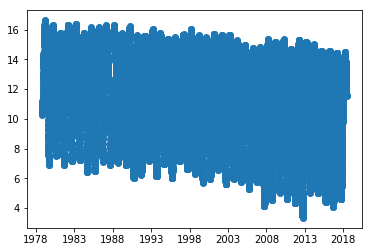

In [2]:
plt.plot(dtime, extent, 'o')
plt.show()

In [4]:
june_extents = []
june_dates = []
for i, date in enumerate(dtime):
    if date.month == 6:
        june_extents.append(extent[i])
        june_dates.append(date)

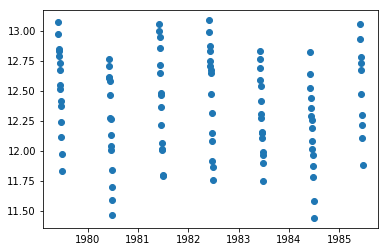

In [9]:
n=100
plt.plot(june_dates[:n], june_extents[:n], 'o')
plt.show()

In [36]:
last_years_index = 0
dates_by_year = []
extents_by_year = []
for i, date in enumerate(june_dates):
    if i < len(june_dates)-1:
        if june_dates[i+1].year != june_dates[i].year:
            dates_by_year.append(june_dates[last_years_index:i])
            extents_by_year.append(june_extents[last_years_index:i])
            last_years_index = i
    else:
        dates_by_year.append(june_dates[last_years_index:])
        extents_by_year.append(june_extents[last_years_index:])

In [43]:
june_slopes = []
june_yint = []
june_years = []
for i, dates in enumerate(dates_by_year):
    day = []
    for date in dates:
        day.append(date.day)
    fit = np.polyfit(day, extents_by_year[i], deg=1)
    june_yint.append(fit[0])
    june_slopes.append(fit[1])
    june_years.append(date.year)

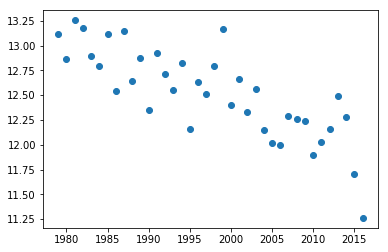

In [44]:
plt.plot(june_years, june_slopes, 'o')
plt.show()